In [13]:
# Load data
from scipy.signal import find_peaks
import numpy as np
import glob
file_list = glob.glob('{0}/*'.format("../data/interim/unlabeled"))

n_peaks = 5

for f in file_list:
    interim_data = np.loadtxt(f, delimiter=',', skiprows=1)
    indexes = np.argpartition(interim_data[:, 1], -n_peaks)[-n_peaks:]

    break

y_axis_data = interim_data[:, 1]

In [29]:
import matplotlib.pyplot as plt

indexes = find_peaks(y_axis_data)[0]
y_axis_peaks = y_axis_data[indexes]

n_peaks_x = y_axis_peaks.argsort()[::-1][:n_peaks]
interim_data_indexes = indexes[n_peaks_x]

(array([912., 146., 205., 505., 347.]),
 array([0.0021709 , 0.00185681, 0.00144903, 0.00138673, 0.00133843]))

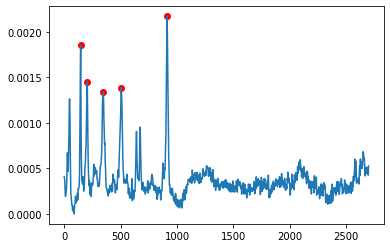

In [31]:
plt.plot(interim_data[:, 0], interim_data[:, 1])
plt.scatter(interim_data[interim_data_indexes, 0], interim_data[interim_data_indexes, 1], color='red')

In [1]:
# Train model and evaluate which feature set is better
from src.models.train_model import train_model

inertia_nc = []
for nc in range(1, 65):
    model = train_model(data_x, n_clusters=nc)
    inertia_nc.append(model.inertia_)

NameError: name 'data_x' is not defined